In [3]:
import warnings
warnings.filterwarnings("ignore") 

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import timedelta,datetime
df=pd.read_csv('C:\\workplace\\electricity_demand\\dataset\\AEP_hourly.csv')
df.columns=['date_time','aep_mw']
df['date_time']=pd.to_datetime(df['date_time'])
df.sort_values('date_time',ascending=True,inplace=True)
df['date_time']=df['date_time'].astype(str)

In [5]:
df['log_aep_mw']=np.log(df['aep_mw'])

In [6]:
def preparion_train (df,num_lags,lag_feature,trigerred_time):

    df_lags=pd.DataFrame(index=df.index,columns=['lags_{}'.format(i) for i in range(num_lags)])
    for i in range(num_lags):
        df_lags['lags_{}'.format(i)]=df[lag_feature].shift(i)
    
    df_targets=pd.DataFrame(index=df.index,columns=['step_{}'.format(i) for i in range(16,40)])
    for i in range(16,40):
        df_targets['step_{}'.format(i)]=df[lag_feature].shift(-i)
    
    df_processed=pd.concat([df[['date_time']],df_targets,df_lags],axis=1)
    #df_processed=df_processed[pd.to_datetime(df_processed['date_time']).dt.hour==trigerred_time]
    return df_processed.dropna()

In [7]:
df_prcessed=preparion_train(df,168*4,'aep_mw',8)
df_prcessed

,date_time,step_16,step_17,step_18,step_19,step_20,step_21,step_22,step_23,step_24,...,lags_662,lags_663,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671
1558,2004-10-29 00:00:00,15071.0,15134.0,14942.0,15103.0,15460.0,15198.0,14782.0,14057.0,13084.0,...,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0,12379.0
1511,2004-10-29 01:00:00,15134.0,14942.0,15103.0,15460.0,15198.0,14782.0,14057.0,13084.0,12200.0,...,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0
1512,2004-10-29 02:00:00,14942.0,15103.0,15460.0,15198.0,14782.0,14057.0,13084.0,12200.0,11676.0,...,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0
1513,2004-10-29 03:00:00,15103.0,15460.0,15198.0,14782.0,14057.0,13084.0,12200.0,11676.0,11297.0,...,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0
1514,2004-10-29 04:00:00,15460.0,15198.0,14782.0,14057.0,13084.0,12200.0,11676.0,11297.0,11036.0,...,15655.0,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116166,2018-08-01 05:00:00,16457.0,16197.0,15259.0,14125.0,13286.0,12587.0,12296.0,12059.0,12224.0,...,20503.0,20276.0,19811.0,19030.0,17847.0,16291.0,14623.0,13362.0,12789.0,13036.0
116167,2018-08-01 06:00:00,16197.0,15259.0,14125.0,13286.0,12587.0,12296.0,12059.0,12224.0,12781.0,...,20606.0,20503.0,20276.0,19811.0,19030.0,17847.0,16291.0,14623.0,13362.0,12789.0
116168,2018-08-01 07:00:00,15259.0,14125.0,13286.0,12587.0,12296.0,12059.0,12224.0,12781.0,13661.0,...,20494.0,20606.0,20503.0,20276.0,19811.0,19030.0,17847.0,16291.0,14623.0,13362.0
116169,2018-08-01 08:00:00,14125.0,13286.0,12587.0,12296.0,12059.0,12224.0,12781.0,13661.0,14326.0,...,20169.0,20494.0,20606.0,20503.0,20276.0,19811.0,19030.0,17847.0,16291.0,14623.0


In [8]:
train_df=df_prcessed[df_prcessed['date_time']<='2017-08-02 23:00:00']
X_train=train_df[train_df.columns[train_df.columns.str.contains('lags_')]]
y_train=train_df[train_df.columns[train_df.columns.str.contains('step_')]]

In [9]:
test_df=df_prcessed[(df_prcessed['date_time']>'2017-08-02 23:00:00') & (pd.to_datetime(df_prcessed['date_time']).dt.hour==8)]
X_test=test_df[test_df.columns[test_df.columns.str.contains('lags_')]]
y_test=test_df[test_df.columns[test_df.columns.str.contains('step_')]]

In [10]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler().fit(X_train)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)
scaler_y=MinMaxScaler().fit(y_train)
y_train_s=scaler_y.transform(y_train)
y_test_s=scaler_y.transform(y_test)

In [11]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.losses import MeanAbsoluteError 
from tensorflow.keras.optimizers import Adam

In [12]:
model=Sequential()
model.add(Input(X_train.shape[1],))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=24))
model.compile(optimizer=Adam(learning_rate=0.001),loss='mse')
model.fit(X_train_s,y_train,epochs=100,validation_data=(X_test_s,y_test))
pred=model.predict(X_test_s)

Epoch 1/100
3496/3496 [==============================] - 8s 2ms/step - loss: 36514180.0000 - val_loss: 11099548.0000
Epoch 2/100
3496/3496 [==============================] - 13s 4ms/step - loss: 10636916.0000 - val_loss: 10439135.0000
Epoch 3/100
3496/3496 [==============================] - 10s 3ms/step - loss: 9875351.0000 - val_loss: 9782546.0000
Epoch 4/100
3496/3496 [==============================] - 10s 3ms/step - loss: 9157433.0000 - val_loss: 8836670.0000
Epoch 5/100
3496/3496 [==============================] - 10s 3ms/step - loss: 7926492.0000 - val_loss: 7194416.5000
Epoch 6/100
3496/3496 [==============================] - 9s 3ms/step - loss: 6550389.0000 - val_loss: 6349708.0000
Epoch 7/100
3496/3496 [==============================] - 10s 3ms/step - loss: 5826668.0000 - val_loss: 5517457.0000
Epoch 8/100
3496/3496 [==============================] - 8s 2ms/step - loss: 5137909.5000 - val_loss: 4767898.0000
Epoch 9/100
3496/3496 [==============================] - 13s 4ms/step -

In [13]:
pred2=pred.reshape(-1)

In [14]:
pred2=pd.Series(pred2)

In [15]:
pred2.describe()

count     8736.000000
mean     14872.016602
std       2206.614990
min       9448.149414
25%      13286.548584
50%      14792.892090
75%      16357.752930
max      22353.511719
dtype: float64

In [16]:
y_test2=pd.Series(np.array(y_test).reshape(-1))

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test2,pred2)

0.0621067534477835

In [20]:
df

,date_time,aep_mw,log_aep_mw
2183,2004-10-01 01:00:00,12379.0,9.423757
2184,2004-10-01 02:00:00,11935.0,9.387231
2185,2004-10-01 03:00:00,11692.0,9.366660
2186,2004-10-01 04:00:00,11597.0,9.358502
2187,2004-10-01 05:00:00,11681.0,9.365719
...,...,...,...
116157,2018-08-02 20:00:00,17673.0,9.779793
116158,2018-08-02 21:00:00,17303.0,9.758635
116159,2018-08-02 22:00:00,17001.0,9.741027
116160,2018-08-02 23:00:00,15964.0,9.678091


<Axes: xlabel='date_time'>

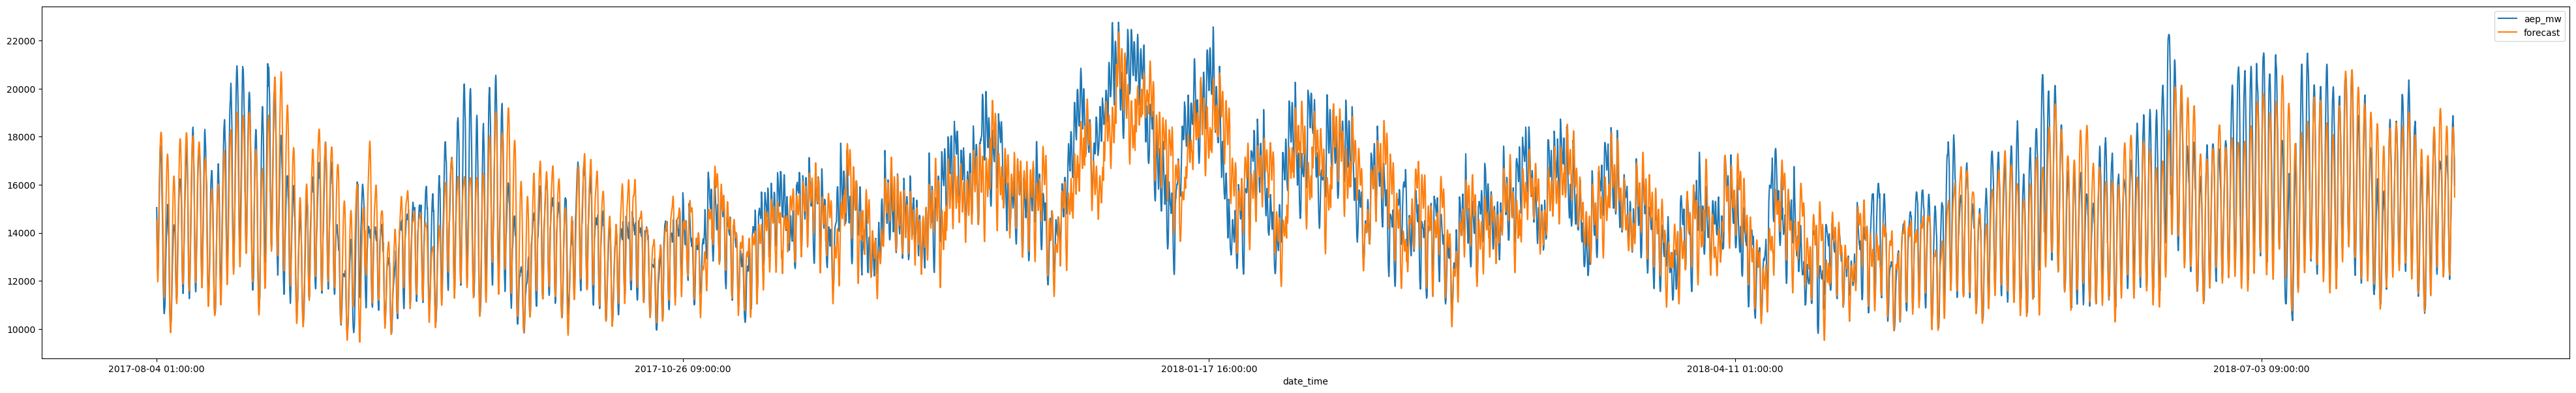

In [23]:
pred_df=pd.concat([y_test2,pred2],axis=1)
pred_df.columns=['aep_mw','forecast']
pred_df.index=df['date_time'].tail(len(pred2))
pred_df.plot(figsize=(50,7))

In [24]:
import plotly.graph_objects as go
figure=go.Figure()
figure.add_trace(go.Scatter(x=df['date_time'].tail(len(pred2)),y=pred_df['aep_mw'],name='actual_electricity_load'))
figure.add_trace(go.Scatter(x=df['date_time'].tail(len(pred2)),y=pred_df['forecast'],name='mlp_forecast'))

In [26]:
test_df

,date_time,step_16,step_17,step_18,step_19,step_20,step_21,step_22,step_23,step_24,...,lags_662,lags_663,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671
110986,2017-08-03 08:00:00,15045.0,13940.0,13230.0,12624.0,12410.0,12539.0,12997.0,13737.0,14356.0,...,18232.0,18268.0,18252.0,17960.0,17712.0,17260.0,16773.0,16237.0,15524.0,14929.0
110962,2017-08-04 08:00:00,12732.0,11870.0,11339.0,10838.0,10639.0,10637.0,10795.0,10906.0,11201.0,...,17234.0,17383.0,17432.0,17887.0,18408.0,17995.0,17406.0,16634.0,15793.0,14917.0
110938,2017-08-05 08:00:00,12181.0,11255.0,10746.0,10503.0,10231.0,10214.0,10267.0,10341.0,10611.0,...,16370.0,16403.0,16226.0,15921.0,15506.0,15104.0,14454.0,13876.0,13227.0,12367.0
110914,2017-08-06 08:00:00,12477.0,11912.0,11497.0,11301.0,11215.0,11456.0,11984.0,12966.0,13566.0,...,16767.0,16426.0,15896.0,15453.0,15035.0,14500.0,13891.0,13214.0,12416.0,11534.0
110890,2017-08-07 08:00:00,13335.0,12550.0,11990.0,11744.0,11473.0,11594.0,12122.0,12864.0,13448.0,...,18183.0,18227.0,18151.0,18139.0,17592.0,16911.0,16295.0,15621.0,15060.0,14446.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116265,2018-07-28 08:00:00,13017.0,12177.0,11523.0,11124.0,10862.0,10649.0,10748.0,10812.0,10966.0,...,20745.0,20685.0,20433.0,20009.0,19627.0,19001.0,17932.0,17016.0,15664.0,14336.0
116241,2018-07-29 08:00:00,13680.0,12927.0,12397.0,12096.0,11938.0,12109.0,12559.0,13474.0,14033.0,...,20871.0,20924.0,20726.0,20374.0,20012.0,19272.0,18277.0,17012.0,15715.0,14158.0
116217,2018-07-30 08:00:00,14363.0,13501.0,12787.0,12382.0,12275.0,12498.0,12926.0,13871.0,14554.0,...,19954.0,20159.0,20382.0,20811.0,21045.0,20444.0,19501.0,18541.0,17394.0,16355.0
116193,2018-07-31 08:00:00,14424.0,13538.0,12903.0,12506.0,12206.0,12295.0,12714.0,13512.0,14139.0,...,21448.0,21481.0,21367.0,21321.0,20999.0,20328.0,19283.0,18207.0,16991.0,15838.0
